In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages

# Lee el archivo .shp
map_df = gpd.read_file("regiones/regiones.shp")

In [3]:
map_df

,region,nombre,departamen,geometry
0,Región I,Metropolitana,Guatemala,"POLYGON ((-90.27283 14.58663, -90.27361 14.586..."
1,Región VIII,Petén,Petén,"POLYGON ((-89.56044 16.02615, -89.56041 16.029..."
2,Región II,Norte,Alta Verapaz y Baja Verapaz,"POLYGON ((-89.72129 15.12601, -89.72364 15.125..."
3,Región III,Nororiental,"El Progreso, Izabal, Zacapa y Chiquimula","POLYGON ((-90.21036 14.67561, -90.21101 14.676..."
4,Región IV,Suroriental,"Santa Rosa, Jalapa y Jutiapa","POLYGON ((-90.24246 13.79063, -90.24392 13.791..."
5,Región V,Central,"Sacatepéquez, Chimaltenango y Escuintla","POLYGON ((-90.98596 13.91410, -90.98597 13.913..."
6,Región VI,Suroccidental,"Sololá, Totonicapán, Quetzaltenango, Suchitepé...","POLYGON ((-91.12259 14.51519, -91.12242 14.514..."
7,Región VII,Noroccidental,Huehuetenango y Quiché,"POLYGON ((-90.99876 14.93697, -90.99904 14.936..."


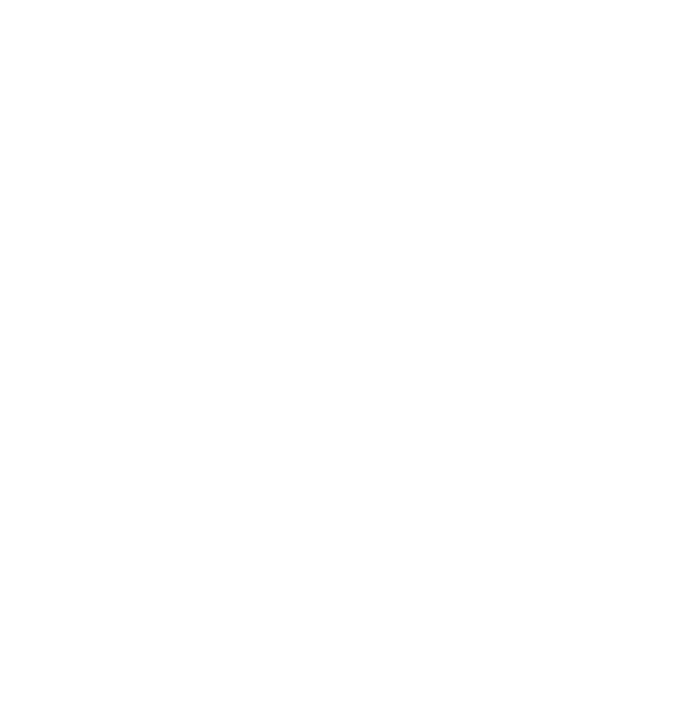

In [5]:
# Asume que tienes un DataFrame llamado df con las columnas 'reg' y 'valor'
# DataFrame de ejemplo
data = {
    'reg': ['Region I', 'Region II', 'Region III', 'Region IV', 'Region V', 'Region VI', 'Region VII', 'Region VIII'],
    'valor': [10, 20, 30, 40, 50, 60, 70, 80]
}
df = pd.DataFrame(data)


# Une el DataFrame con el archivo .shp en la columna 'region'
merged = map_df.set_index('region').join(df.set_index('reg'))

# Define una paleta de colores personalizada con QColor
color_min = [255/255, 255/255, 255/255, 255/255]  # Este es el color para el valor mínimo
color_max = [0/255, 174/255, 239/255, 255/255]  # Este es el color para el valor máximo
cmap = LinearSegmentedColormap.from_list("region", [color_min, color_max])

# Crea el mapa
fig, ax = plt.subplots(1, figsize=(975/80, 719/80))  # Convertir tamaño de pixeles a pulgadas (1 pulgada=80 pixeles)
merged.plot(column='valor', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Elimina los ejes
ax.axis('off')

# Exporta a PDF
pp = PdfPages('mapa.pdf')
pp.savefig(fig, dpi=300)  # dpi es el nivel de detalle, puedes ajustarlo a tus necesidades
pp.close()
